In [1]:
#import pandas as pd
#import json
import networkx as nx

In [2]:
import sys
sys.path.append("../pysad")
#import pysad
#import pysad.utils
import pysad.exploration
import pysad.synthesis
import pysad.graph
from pysad.NodeInfo import SynthNodeInfo

In [3]:
sys.path.append("../littleballoffur")

In [4]:
from littleballoffur.dataset import GraphReader

In [5]:
import test_module

In [6]:
data_path = '../synthesis/'

# Creating the graph

In [7]:
import importlib
importlib.reload(pysad.exploration)
importlib.reload(pysad.synthesis)
importlib.reload(test_module)

<module 'test_module' from '/home/benjamin/Documents/EPFL/Research/sad/spiky-simulation/test_module.py'>

In [8]:
data_path = '../synthesis/'


In [9]:
graph_type = 'real'
if graph_type == 'BA':
    graphname = 'Barabasi-Albert'
    nodes = 50000
    edges_per_node = 5
    G = nx.barabasi_albert_graph(nodes, edges_per_node)
elif graph_type == 'ER':
    graphname = 'Erdos-Renyi'
    nb_nodes = 50000
    nb_edges = 200000
    G = nx.gnm_random_graph(nb_nodes, nb_edges)
elif graph_type == 'real':
    graphname = 'Real network'
    reader = GraphReader("facebook")
    G = reader.get_graph()
else:
    raise ValueError('Unknow graph type.')
graph_handle = pysad.synthesis.SyntheticNetwork(G)
G.graph['name'] = graphname

In [185]:
print('Graph info')
print('----------')
print('graph type:',G.graph['name'])
print('nb of nodes:',G.number_of_nodes(),', nb of edges:',G.number_of_edges())
#print('Diameter:', nx.diameter(G))

Graph info
----------
graph type: Real network
nb of nodes: 22470 , nb of edges: 171002


## Statistics of propagation

In [11]:
import numpy as np
import importlib
importlib.reload(pysad.exploration)
importlib.reload(pysad.synthesis)

<module 'pysad.synthesis' from '../pysad/pysad/synthesis.py'>

In [175]:
number_of_nodes = None
exploration_depth = 8
proba = 0.1

In [176]:
graph_handle.rules['min_degree'] = 1
params = {'nb_iter' : 10, 'exploration_depth' : exploration_depth,
            'initial_node' : 200, 'random_subset_size' : proba, 'balltype' : 'spikyball',
         'number_of_nodes' : number_of_nodes}
node_spiky, graph_spiky = test_module.ball_test(graph_handle,params)
# dictionary with each node as key and its degree as value
degree_spiky = dict(G.degree(node_spiky.keys()))

-- experiment 0 --
Initial node 200
new edges: 6 subset: 6 in_edges: 0
new edges: 585 subset: 58 in_edges: 12
new edges: 2703 subset: 270 in_edges: 96
new edges: 15122 subset: 1512 in_edges: 2333
new edges: 29751 subset: 2975 in_edges: 31316
new edges: 26557 subset: 2656 in_edges: 41081
new edges: 19040 subset: 1904 in_edges: 29918
new edges: 10609 subset: 1061 in_edges: 20285
-- experiment 1 --
Initial node 200
new edges: 6 subset: 6 in_edges: 0
new edges: 585 subset: 58 in_edges: 12
new edges: 2588 subset: 259 in_edges: 110
new edges: 15678 subset: 1568 in_edges: 2378
new edges: 30616 subset: 3062 in_edges: 31588
new edges: 25636 subset: 2564 in_edges: 42156
new edges: 16853 subset: 1685 in_edges: 30677
new edges: 11245 subset: 1124 in_edges: 17416
-- experiment 2 --
Initial node 200
new edges: 6 subset: 6 in_edges: 0
new edges: 585 subset: 58 in_edges: 12
new edges: 3015 subset: 302 in_edges: 111
new edges: 16628 subset: 1663 in_edges: 2866
new edges: 31329 subset: 3133 in_edges: 33

In [177]:
graph_handle.rules['min_degree'] = 1
params = {'nb_iter' : 10, 'exploration_depth' : exploration_depth,
            'initial_node' : 200, 'random_subset_size' : proba, 'balltype' : 'fireball',
         'number_of_nodes' : number_of_nodes}
node_fire, graph_fire = test_module.ball_test(graph_handle,params)
# dictionary with each node as key and its degree as value
degree_fire = dict(G.degree(node_fire.keys()))

-- experiment 0 --
Initial node 200
new edges: 6 subset: 6 in_edges: 0
new edges: 585 subset: 58 in_edges: 12
new edges: 2281 subset: 228 in_edges: 115
new edges: 10498 subset: 1050 in_edges: 1443
new edges: 27214 subset: 2721 in_edges: 14272
new edges: 29356 subset: 2936 in_edges: 36591
new edges: 20603 subset: 2060 in_edges: 31659
new edges: 13358 subset: 1336 in_edges: 19334
-- experiment 1 --
Initial node 200
new edges: 6 subset: 6 in_edges: 0
new edges: 585 subset: 58 in_edges: 12
new edges: 1937 subset: 194 in_edges: 88
new edges: 10485 subset: 1048 in_edges: 1122
new edges: 27171 subset: 2717 in_edges: 15265
new edges: 27796 subset: 2780 in_edges: 38243
new edges: 21579 subset: 2158 in_edges: 29469
new edges: 13767 subset: 1377 in_edges: 20154
-- experiment 2 --
Initial node 200
new edges: 6 subset: 6 in_edges: 0
new edges: 585 subset: 58 in_edges: 12
new edges: 1623 subset: 162 in_edges: 92
new edges: 8819 subset: 882 in_edges: 987
new edges: 27202 subset: 2720 in_edges: 13148


In [67]:
graph_handle.rules['min_degree'] = 1
params_snowball = {'nb_iter' : 10, 'exploration_depth' : 3,
            'initial_node' : 200, 'random_subset_size' : 1, 'balltype' : 'spikyball',
         'number_of_nodes' : number_of_nodes}
node_snowball,graph_snowball = test_module.ball_test(graph_handle,params_snowball)
# dictionary with each node as key and its degree as value
degree_snowball = dict(G.degree(node_snowball.keys()))

-- experiment 0 --
Initial node 200
new edges: 6 subset: 6 in_edges: 0
new edges: 585 subset: 585 in_edges: 12
new edges: 20428 subset: 20428 in_edges: 3937
-- experiment 1 --
Initial node 200
new edges: 6 subset: 6 in_edges: 0
new edges: 585 subset: 585 in_edges: 12
new edges: 20428 subset: 20428 in_edges: 3937
-- experiment 2 --
Initial node 200
new edges: 6 subset: 6 in_edges: 0
new edges: 585 subset: 585 in_edges: 12
new edges: 20428 subset: 20428 in_edges: 3937
-- experiment 3 --
Initial node 200
new edges: 6 subset: 6 in_edges: 0
new edges: 585 subset: 585 in_edges: 12
new edges: 20428 subset: 20428 in_edges: 3937
-- experiment 4 --
Initial node 200
new edges: 6 subset: 6 in_edges: 0
new edges: 585 subset: 585 in_edges: 12
new edges: 20428 subset: 20428 in_edges: 3937
-- experiment 5 --
Initial node 200
new edges: 6 subset: 6 in_edges: 0
new edges: 585 subset: 585 in_edges: 12
new edges: 20428 subset: 20428 in_edges: 3937
-- experiment 6 --
Initial node 200
new edges: 6 subset: 6

## Degree stats

In [68]:
def bin_degrees(visits,degrees):
    count_dic = {}
    bin_count=100
    bins = np.logspace(0,10,num=bin_count)
    for v,d in zip(visits,degrees):
        l_list = [n for n in bins if n<=d]
        last = l_list[-1]
        if last in count_dic:
            count_dic[last].append(v)
        else:
            count_dic[last] = [v]
    # process the mean value
    hist_dic = {}
    for b,l in count_dic.items():
        hist_dic[b] = np.mean(l)
    return list(hist_dic.keys()), list(hist_dic.values())

In [69]:
def degree_wrt_visits(node_dic,degree_dic):
    visits = []
    degrees = []
    for node,iters in node_dic.items():
        nb_visits = len(iters)
        visits.append(nb_visits)
        degrees.append(degree_dic[node])

    return visits,degrees

In [178]:
xsn,ysn = degree_wrt_visits(node_snowball,degree_snowball)

xsp,ysp = degree_wrt_visits(node_spiky,degree_spiky)

xf,yf = degree_wrt_visits(node_fire,degree_fire)

In [179]:
import seaborn as sns

In [180]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
sns.set_context("paper", font_scale=1.5)

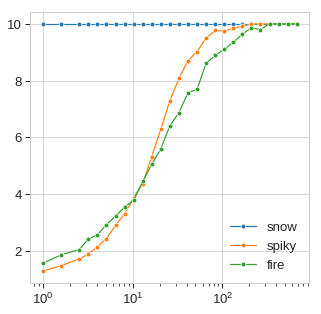

In [181]:
plt.figure(figsize=(5,5))
xx,yy = bin_degrees(xsn,ysn)
sns.lineplot(x=xx, y=yy, label='snow' , marker='o')
xx,yy = bin_degrees(xsp,ysp)
sns.lineplot(x=xx, y=yy, label='spiky' , marker='o')
xx,yy = bin_degrees(xf,yf)
sns.lineplot(x=xx, y=yy,label='fire' , marker='o')
plt.xscale('log')

## Same plot with error bars

In [182]:
def bin_degrees_repeat(visits,degrees):
    count_dic = {}
    bin_count=100
    bins = np.logspace(0,10,num=bin_count)
    for v,d in zip(visits,degrees):
        l_list = [n for n in bins if n<=d]
        last = l_list[-1]
        if last in count_dic:
            count_dic[last].append(v)
        else:
            count_dic[last] = [v]
    # process the mean value
    d_list = []
    v_list = []
    for b,l in count_dic.items():
        for vis in l:
            d_list.append(b)
            v_list.append(vis)
    return d_list,v_list

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


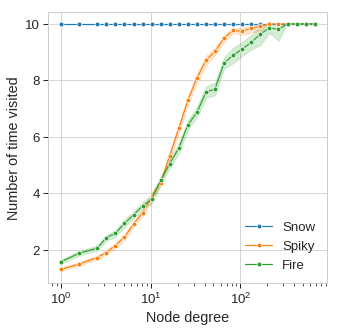

In [183]:
plt.figure(figsize=(5,5))
xx,yy = bin_degrees_repeat(xsn,ysn)
sns_plot = sns.lineplot(x=xx, y=yy, label='Snow' , marker='o')
xx,yy = bin_degrees_repeat(xsp,ysp)
sns.lineplot(x=xx, y=yy, label='Spiky' , marker='o')
xx,yy = bin_degrees_repeat(xf,yf)
sns.lineplot(x=xx, y=yy,label='Fire' , marker='o')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Node degree')
plt.ylabel('Number of time visited')
fig = sns_plot.get_figure()
fig.savefig(data_path + 'visits_wrt_degree_d'+ str(exploration_depth)+'_p'+str(proba) +'.png')